In [114]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [144]:
#Read dataset
df = pd.read_csv(r'C:\Users\Ethan\Desktop\Group Project\weatherAUS.csv',index_col=0,sep=",", encoding='cp1252')




df["Rainfall"] = df["Rainfall"].fillna(df["Rainfall"].median(skipna=True))
df["Evaporation"] = df["Evaporation"].fillna(df["Evaporation"].median(skipna=True))
df["Sunshine"] = df["Sunshine"].fillna(df["Sunshine"].median(skipna=True))
df["WindGustSpeed"] = df["WindGustSpeed"].fillna(df["WindGustSpeed"].median(skipna=True))
df["WindSpeed9am"] = df["WindSpeed9am"].fillna(df["WindSpeed9am"].median(skipna=True))
df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].median(skipna=True))
df["Humidity9am"] = df["Humidity9am"].fillna(df["Humidity9am"].median(skipna=True))
df["Humidity3pm"] = df["Humidity3pm"].fillna(df["Humidity3pm"].median(skipna=True))
df["Cloud9am"] = df["Cloud9am"].fillna(df["Cloud9am"].median(skipna=True))
df["Cloud3pm"] = df["Cloud3pm"].fillna(df["Cloud3pm"].median(skipna=True))
df["Pressure9am"] = df["Pressure9am"].fillna(df["Pressure9am"].median(skipna=True))
df["Pressure3pm"] = df["Pressure3pm"].fillna(df["Pressure3pm"].median(skipna=True))

df["MinTemp"] = df["MinTemp"].fillna(method="ffill")
df["MaxTemp"] = df["MaxTemp"].fillna(method="ffill")
df["Temp9am"] = df["Temp9am"].fillna(method="ffill")
df["Temp3pm"] = df["Temp3pm"].fillna(method="ffill")

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].value_counts().index[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].value_counts().index[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].value_counts().index[0])

df = pd.concat([df,pd.get_dummies(df['Location'], prefix='Location')],axis=1)
df.drop(['Location'],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df["WindGustDir"], prefix='WindGustDir')],axis=1)
df.drop(['WindGustDir'],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['WindDir9am'], prefix='WindDir9am')],axis=1)
df.drop(['WindDir9am'],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['WindDir3pm'], prefix='WindDir3pm')],axis=1)
df.drop(['WindDir3pm'],axis=1, inplace=True)

df["RainToday"] = df["RainToday"].fillna(df["RainToday"].mode(dropna=True))
df["RainToday"] = df["RainToday"].astype("category")
df["RainTodayBinary"] = df["RainToday"].cat.codes
df.drop(['RainToday'],axis=1, inplace=True)

df=df.dropna(subset=["RainTomorrow"])
df["RainTomorrow"] = df["RainTomorrow"].astype("category")
df["RainTomorrowBinary"] = df["RainTomorrow"].cat.codes
df.drop(['RainTomorrow'],axis=1, inplace=True)


([<matplotlib.axis.XTick at 0x2aa06e09550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

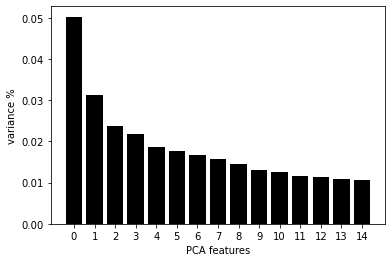

In [145]:
#Transform dataset (only normalized on not normalized datasets)
x = StandardScaler().fit_transform(df.iloc[:,0:-1])
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)
features = range(pca.n_components_)

#plot explained variance graph
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Text(0, 0.5, 'PCA 2')

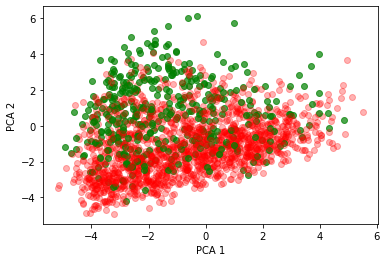

In [148]:
#plot PCA graph
PCA_components = pd.DataFrame(principalComponents[0:2000])
for i in range(len(PCA_components[0])-1):
    if df.iloc[i,-1] == 1:
        plt.scatter(PCA_components[0][i], PCA_components[1][i], alpha=.7, color='Green')
    elif df.iloc[i,-1] == 0:
        plt.scatter(PCA_components[0][i], PCA_components[1][i], alpha=.3, color='Red')
        
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

[0.03194282 0.03319745 0.02651574 0.01781811 0.04937392 0.03956038
 0.02606082 0.02709743 0.04566735 0.11125018 0.03692129 0.04233227
 0.03172762 0.03720378 0.029952   0.03462437 0.00259197 0.00267345
 0.00247579 0.00115751 0.00215066 0.00238432 0.00228021 0.00218989
 0.00182997 0.00281649 0.00182538 0.00291551 0.00265847 0.00167002
 0.00185266 0.00272677 0.00096907 0.00220763 0.00227252 0.00229234
 0.00167464 0.00174702 0.0030454  0.00188094 0.00115652 0.00131257
 0.00226241 0.00277643 0.00243455 0.002368   0.00166748 0.00275901
 0.00240583 0.00352319 0.00243173 0.00279927 0.00183428 0.0029862
 0.00262183 0.00123239 0.00220466 0.00081533 0.00219632 0.00330731
 0.0026147  0.00290269 0.00350562 0.00291417 0.00137203 0.00365581
 0.00363994 0.00361096 0.00504837 0.0041417  0.00432431 0.00452205
 0.00496092 0.00509619 0.00442716 0.00452982 0.00510365 0.00494881
 0.0063715  0.0051718  0.00499508 0.00348273 0.00400391 0.00340234
 0.00765552 0.0044641  0.00502224 0.00490719 0.00548387 0.00445

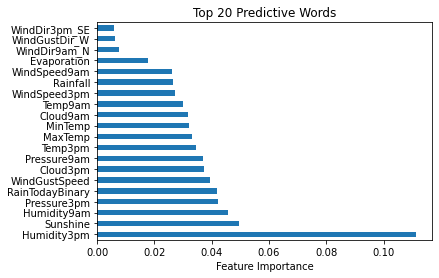

MemoryError: Unable to allocate 106. GiB for an array with shape (14177526949,) and data type int64

In [149]:
model = ExtraTreesClassifier(n_estimators=20)
model.fit(df.iloc[:,0:-1],df.iloc[:,-1])

#Set number of features to display
num_features = 20

#plot graph of feature importances for better visualization
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_,index=df.iloc[:,:-1].columns)
mostimportant= feat_importances.nlargest(num_features)

#plot data on graph
mostimportant.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title("Top "+str(num_features)+" Predictive Attributes")
plt.show()



In [128]:
#output data into new feature selected dataset
outputdf= pd.DataFrame(index=df.index)
for col in df.columns:
    if col in mostimportant.index:
        column = df[col]
        outputdf=outputdf.join(column)
outputdf = outputdf.join(df.iloc[:,-1])

filepath = r'C:\Users\Ethan\Desktop\Group Project\testout.csv'
df.to_csv(filepath,sep=",", encoding='cp1252')

ExtraTreesClassifier(n_estimators=20)

In [112]:
df.dtypes

MinTemp               float64
MaxTemp               float64
Rainfall              float64
Evaporation           float64
Sunshine              float64
                       ...   
WindDir3pm_W            uint8
WindDir3pm_WNW          uint8
WindDir3pm_WSW          uint8
RainTodayBinary          int8
RainTomorrowBinary       int8
Length: 115, dtype: object

In [105]:
"hello".type
df.isnull().sum()

AttributeError: 'str' object has no attribute 'type'

In [41]:
def Binary(Series):
    for entry in Series:
        if entry == "Yes":
            entry = 1
        else:
            entry = 0
    return Series